In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_final=pd.read_csv('data/output/final_Data.csv')
df_final.info()

/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/517137550.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final=pd.read_csv('data/output/final_Data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357960 entries, 0 to 357959
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   gvkey               357960 non-null  int64  
 1   datadate            357960 non-null  object 
 2   fyear               357692 non-null  float64
 3   cusip               357960 non-null  object 
 4   ipodate             153325 non-null  object 
 5   conm                357960 non-null  object 
 6   at                  288230 non-null  float64
 7   sale                252854 non-null  float64
 8   ebit                247325 non-null  float64
 9   re                  280532 non-null  float64
 10  reuna               242654 non-null  float64
 11  wcap                206246 non-null  float64
 12  mkvalt              156879 non-null  float64
 13  lt                  287466 non-null  float64
 14  gsector             306857 non-null  float64
 15  indfmt              357960 non-nul

In [3]:
df_final_data_copy = df_final.copy()
df_final_data_copy.drop(columns=['reuna','issuer','issue','check_digit','issuer+issue','gvkey'], inplace=True)
df_final_data_copy['datadate']= pd.to_datetime(df_final_data_copy['datadate'])
df_final_data_copy['fyear'] =  df_final_data_copy.apply(lambda row: row['fyear'] if not pd.isna(row['fyear']) else row['datadate'].year,axis=1)
df_final_data_copy['fyear'] = df_final_data_copy['fyear'].astype(int)
columns_of_ratios = ['liquidity','re/at','profitability','mkvalt/lt','AssetTurnoverRatio']

indfmt
INDL    320963
FS       36997
Name: count, dtype: int64


<Axes: xlabel='indfmt'>

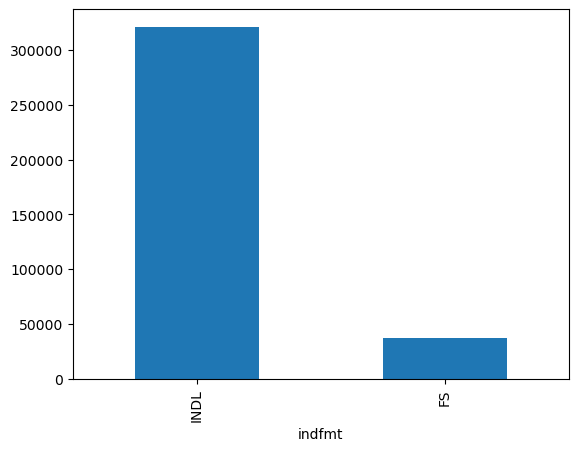

In [4]:
# showing different counts of financial and industrial data
value_counts = df_final_data_copy['indfmt'].value_counts()
print(value_counts)
value_counts.plot(kind='bar')

In [5]:
df_financial_data = df_final_data_copy[df_final_data_copy['indfmt']=='FS']
df_industrial_data = df_final_data_copy[df_final_data_copy['indfmt']=='INDL']

liquidity             36997
re/at                  3538
profitability         36997
mkvalt/lt             16443
AssetTurnoverRatio    36997
dtype: int64


<Axes: title={'center': 'NaNs Counts of financial'}>

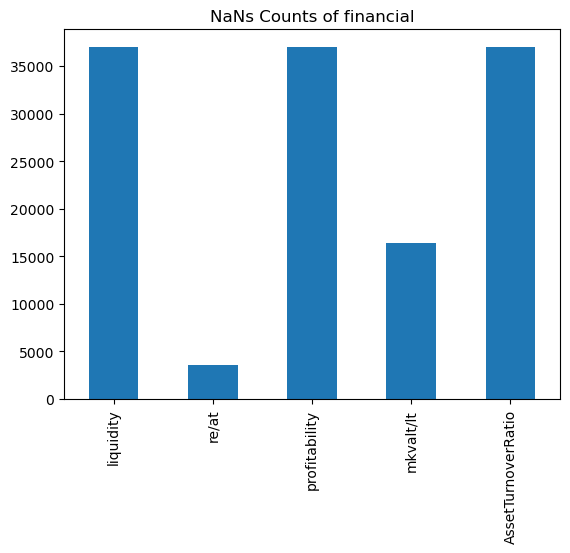

In [6]:
nas_in_finanical_data = df_financial_data[columns_of_ratios].isna().sum()
print(nas_in_finanical_data)
nas_in_finanical_data.plot(kind='bar',title="NaNs Counts of financial")

liquidity             114768
re/at                  73911
profitability          73735
mkvalt/lt             184894
AssetTurnoverRatio     68344
dtype: int64


<Axes: title={'center': 'NaNs Counts of industrial'}, xlabel='ratio', ylabel='Nans Counts'>

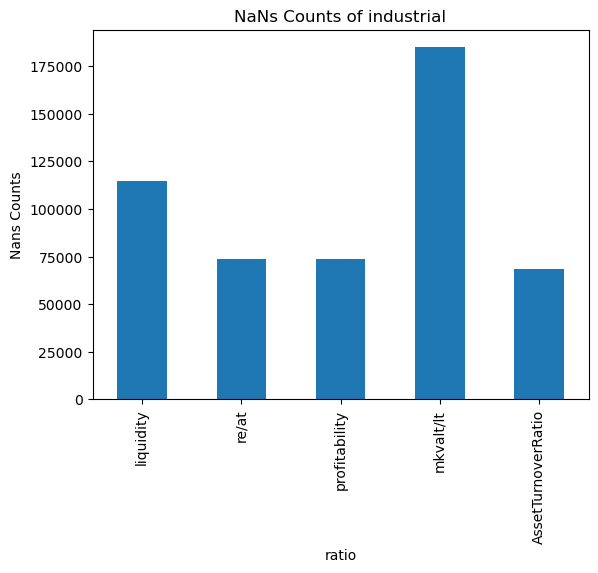

In [7]:
nas_in_industrial_data = df_industrial_data[columns_of_ratios].isna().sum()
print(nas_in_industrial_data)
nas_in_industrial_data.plot(kind='bar',title="NaNs Counts of industrial",xlabel='ratio',ylabel='Nans Counts')

In [8]:
df_industrial_data['gsector'] = df_industrial_data['gsector'].replace([np.inf, -np.inf], np.nan)
df_industrial_data['gsector'] = df_industrial_data['gsector'].fillna(0)



/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/353946891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrial_data['gsector'] = df_industrial_data['gsector'].replace([np.inf, -np.inf], np.nan)
/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/353946891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrial_data['gsector'] = df_industrial_data['gsector'].fillna(0)


In [9]:
df_industrial_data['gsector'] = df_industrial_data['gsector'].astype(int)

/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/314954257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_industrial_data['gsector'] = df_industrial_data['gsector'].astype(int)


gsector
0     51052
40    47640
45    44010
25    38866
35    37547
20    37015
15    16246
10    16009
30    11066
50     9191
60     6444
55     5877
Name: count, dtype: int64


<Axes: title={'center': 'Value Counts of industrial sectors'}, xlabel='sector code', ylabel='No of rows'>

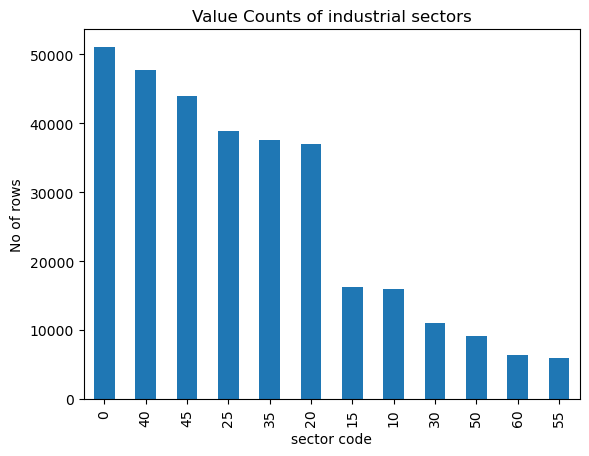

In [10]:
induatrial_value_countss = df_industrial_data['gsector'].value_counts()
print(induatrial_value_countss)
induatrial_value_countss.plot(kind='bar',title='Value Counts of industrial sectors',xlabel='sector code',ylabel='No of rows')

         liquidity  re/at  profitability  mkvalt/lt  AssetTurnoverRatio
gsector                                                                
0            50623  50561          50643      50763               50644
10            1086   3175            688       7226                 691
15             680   1060            619       8441                 618
20            2853   2017           1625      18629                1621
25            4662   2799           2273      21701                2282
30             479    555            452       5708                 452
35            2126   2241           2033      16047                2043
40           43008   6676          10675      24487                5994
45            3399   3408           3219      21345                3223
50             658    653            483       4683                 486
55             185    328            834       3013                  99
60            5009    438            191       2851             

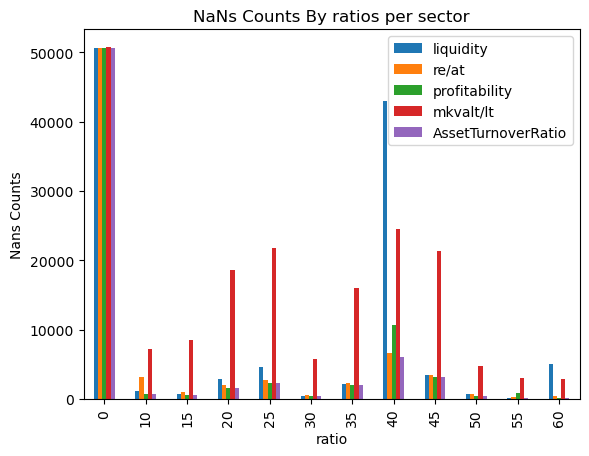

gsector
0     253234
10     12866
15     11418
20     26745
25     33717
30      7646
35     24490
40     90840
45     34594
50      6963
55      4459
60      8680
dtype: int64


<Axes: title={'center': 'NaNs Counts By Sector'}, xlabel='Sector', ylabel='Nans Counts'>

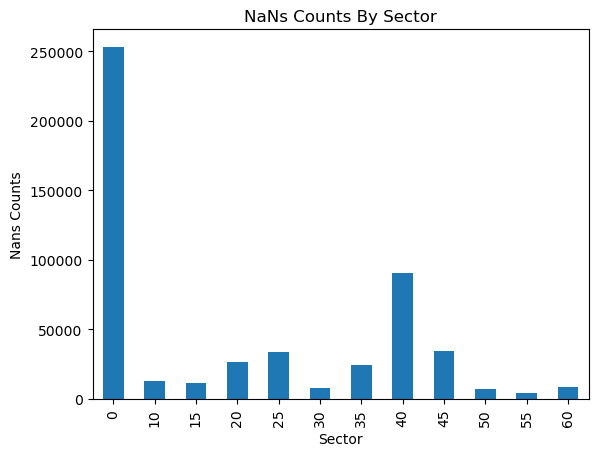

In [11]:
# Group by 'gsector' and count the number of NaN values in the specified columns
nan_counts_by_ratio = df_industrial_data.groupby('gsector')[columns_of_ratios].apply(lambda x: x.isna().sum())
nan_counts = df_industrial_data.groupby('gsector')[columns_of_ratios].apply(lambda x: x.isna().sum().sum())
# Display the result
print(nan_counts_by_ratio)

nan_counts_by_ratio.plot(kind='bar')
plt.title('NaNs Counts By ratios per sector')
plt.xlabel('ratio')
plt.ylabel('Nans Counts')
plt.show()

print(nan_counts)
nan_counts.plot(kind='bar',title='NaNs Counts By Sector',xlabel='Sector',ylabel='Nans Counts')


gsector
0     99.206299
10    16.073459
15    14.056383
20    14.450898
25    17.350383
30    13.818905
35    13.044984
40    38.136020
45    15.720973
50    15.151779
55    15.174409
60    26.939789
dtype: float64


<Axes: title={'center': 'Percentage of NaN by sector'}, xlabel='sector code', ylabel='Percentage'>

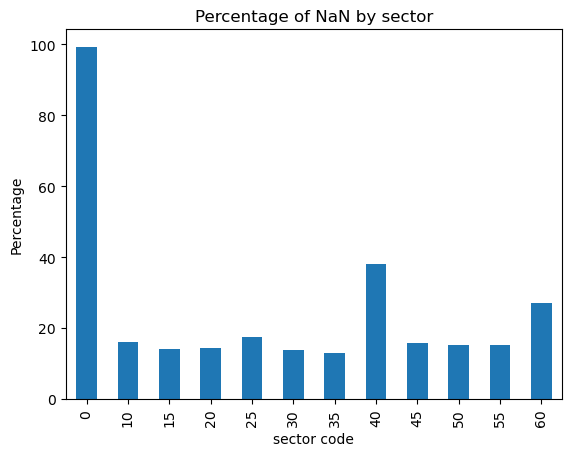

In [12]:
percentage_nan = (nan_counts / (induatrial_value_countss*5)) * 100
print(percentage_nan)
percentage_nan.plot(kind='bar',title='Percentage of NaN by sector',xlabel='sector code',ylabel='Percentage')



# Selecting Sector code 35 (Health Care) , as it has lowest percentage of NaN values, and also comparatively high number of rows ( 3rd position)

In [13]:
df =df_industrial_data[df_industrial_data['gsector']==35]
df

,datadate,fyear,cusip,ipodate,conm,at,sale,ebit,re,wcap,...,profitability,mkvalt/lt,AssetTurnoverRatio,PERMNO,DLSTCD,HCOMNAM,CUSIP,HEXCD,BEGDAT,ENDDAT
177,1985-12-31,1985,020813101,NaN,ALPHARMA INC -CL A,92.265,96.819,12.300,12.502,18.502,...,0.133312,NaN,1.049358,65832,233,ALPHARMA INC,02081310,1,1984-02-15,2008-12-29
178,1986-12-31,1986,020813101,NaN,ALPHARMA INC -CL A,119.456,123.622,12.788,19.772,13.687,...,0.107052,NaN,1.034875,65832,233,ALPHARMA INC,02081310,1,1984-02-15,2008-12-29
179,1987-12-31,1987,020813101,NaN,ALPHARMA INC -CL A,250.667,158.929,17.803,30.463,39.334,...,0.071023,NaN,0.634024,65832,233,ALPHARMA INC,02081310,1,1984-02-15,2008-12-29
180,1988-12-31,1988,020813101,NaN,ALPHARMA INC -CL A,266.618,236.482,28.271,34.311,37.679,...,0.106036,NaN,0.886969,65832,233,ALPHARMA INC,02081310,1,1984-02-15,2008-12-29
181,1989-12-31,1989,020813101,NaN,ALPHARMA INC -CL A,289.650,266.292,31.092,45.858,48.068,...,0.107343,NaN,0.919358,65832,233,ALPHARMA INC,02081310,1,1984-02-15,2008-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357942,2022-12-31,2022,74907L300,NaN,QUOIN PHARMACEUTICALS LTD,14.458,0.000,-9.257,-37.517,9.842,...,-0.640268,NaN,0.000000,16161,100,QUOIN PHARMACEUTICALS LTD,74907L30,3,2016-07-29,2024-12-31
357943,2023-12-31,2023,74907L300,NaN,QUOIN PHARMACEUTICALS LTD,12.169,0.000,-9.379,-46.203,7.705,...,-0.770729,NaN,0.000000,16161,100,QUOIN PHARMACEUTICALS LTD,74907L30,3,2016-07-29,2024-12-31
357946,2021-12-31,2021,405552100,2022-07-18,HALEON PLC,46650.099,12924.885,2816.529,35685.952,1371.703,...,0.060376,NaN,0.277060,23209,100,HALEON PLC,40555210,1,2022-07-22,2024-12-31
357947,2022-12-31,2022,405552100,2022-07-18,HALEON PLC,41948.594,13082.804,2913.448,19566.371,-374.724,...,0.069453,NaN,0.311877,23209,100,HALEON PLC,40555210,1,2022-07-22,2024-12-31


fyear
2021    1384
2020    1365
2022    1356
2019    1303
2023    1222
2018    1161
1996    1082
1995    1075
2017    1064
1997    1061
1998    1060
1999    1045
2016    1023
2000    1001
1994     984
2001     975
2015     973
1993     971
2002     956
2004     951
2003     947
2014     940
2005     930
1992     912
2006     910
2013     896
2007     881
2012     845
1991     839
2008     829
2011     795
2009     788
2010     770
1990     755
1989     676
1988     656
1987     625
1986     581
1985     530
2024     337
1984      93
Name: count, dtype: int64


<Axes: title={'center': 'Value Counts of years in sector 35'}, xlabel='year', ylabel='No of rows'>

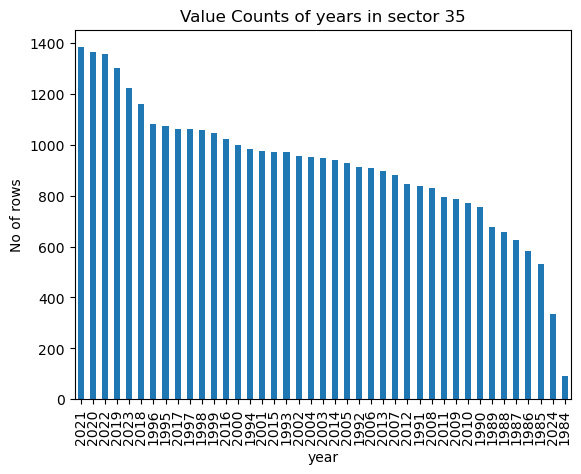

In [14]:
values = df['fyear'].value_counts()
print(values)
values.plot(kind='bar',title='Value Counts of years in sector 35',xlabel='year',ylabel='No of rows')


In [15]:
df_new =df[(df['fyear']>2010)&(df['fyear']<2020)]


In [16]:
df_new

,datadate,fyear,cusip,ipodate,conm,at,sale,ebit,re,wcap,...,profitability,mkvalt/lt,AssetTurnoverRatio,PERMNO,DLSTCD,HCOMNAM,CUSIP,HEXCD,BEGDAT,ENDDAT
643,2011-12-31,2011,002824100,NaN,ABBOTT LABORATORIES,60276.893,38851.259,8996.448,18310.177,8288.546,...,0.149252,2.469946,0.644546,20482,100,ABBOTT LABORATORIES,00282410,1,1937-03-01,2024-12-31
644,2012-12-31,2012,002824100,NaN,ABBOTT LABORATORIES,67234.944,39873.910,9783.515,20557.318,18042.407,...,0.145512,2.554857,0.593053,20482,100,ABBOTT LABORATORIES,00282410,1,1937-03-01,2024-12-31
645,2013-12-31,2013,002824100,NaN,ABBOTT LABORATORIES,42953.000,21848.000,2674.000,19967.000,9740.000,...,0.062254,3.355117,0.508649,20482,100,ABBOTT LABORATORIES,00282410,1,1937-03-01,2024-12-31
646,2014-12-31,2014,002824100,NaN,ABBOTT LABORATORIES,41275.000,20247.000,2927.000,17821.000,4729.000,...,0.070915,3.457514,0.490539,20482,100,ABBOTT LABORATORIES,00282410,1,1937-03-01,2024-12-31
647,2015-12-31,2015,002824100,NaN,ABBOTT LABORATORIES,41247.000,20405.000,3372.000,19099.000,4969.000,...,0.081751,3.319983,0.494703,20482,100,ABBOTT LABORATORIES,00282410,1,1937-03-01,2024-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357829,2019-12-31,2019,04216R102,NaN,ARMATA PHARMACEUTICALS INC,25.451,0.000,-17.989,-157.521,1.776,...,-0.706809,2.970142,0.000000,80577,100,ARMATA PHARMACEUTICALS INC,04216R10,2,1994-05-20,2024-12-31
357871,2019-12-31,2019,30315R107,2016-05-24,F-STAR THERAPEUTICS INC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16069,233,F STAR THERAPEUTICS INC,30315R10,3,2016-05-06,2023-03-08
357895,2019-12-31,2019,45256X103,NaN,IMMUNITYBIO INC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,15533,100,IMMUNITYBIO INC,45256X10,3,2015-07-28,2024-12-31
357929,2019-10-31,2019,185053402,NaN,CLEARMIND MEDICINE INC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,23514,100,CLEARMIND MEDICINE INC,18505340,3,2022-11-15,2024-12-31


In [17]:
df_pivot1 = df_new.pivot_table(index=['cusip','conm','PERMNO','DLSTCD','HCOMNAM','HEXCD','BEGDAT','ENDDAT','ipodate'], columns='fyear', values=['liquidity','re/at','profitability','mkvalt/lt','AssetTurnoverRatio'])
df_pivot1.columns= [f'{year}-{ratio}' for ratio, year in df_pivot1.columns]
# Reset the index to make 'Company' a column again
df_pivot1.reset_index(inplace=True)

# Display the reshaped DataFrame
df_pivot1

,cusip,conm,PERMNO,DLSTCD,HCOMNAM,HEXCD,BEGDAT,ENDDAT,ipodate,2011-AssetTurnoverRatio,...,2019-profitability,2011-re/at,2012-re/at,2013-re/at,2014-re/at,2015-re/at,2016-re/at,2017-re/at,2018-re/at,2019-re/at
0,00091E109,ABSCI CORP,21604,100,ABSCI CORP,3,2021-07-22,2024-12-31,2021-07-22,NaN,...,-0.321761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.125006
1,00166B105,ALX ONCOLOGY HOLDI INC,19542,100,ALX ONCOLOGY HOLDINGS INC,3,2020-07-17,2024-12-31,2020-07-17,NaN,...,-1.796834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.795683,-6.817347
2,001744101,AMN HEALTHCARE SERVICES INC,89215,100,A M N HEALTHCARE SERVICES INC,1,2001-11-13,2024-12-31,2001-11-13,1.656861,...,0.104904,-0.484856,-0.468969,-0.357583,-0.261636,-0.109435,0.008149,0.113335,0.191737,0.207180
3,002120202,ATYR PHARMA INC,15378,100,ATYR PHARMA INC,3,2015-05-07,2024-12-31,2015-05-07,NaN,...,-0.634962,NaN,NaN,-2.158297,-5.339082,-1.220706,-2.683113,-2.957932,-5.664145,-8.907483
4,002567105,ABAXIS INC,77279,233,ABAXIS INC,3,1992-01-23,2018-07-31,1992-01-22,0.861194,...,NaN,0.273444,0.273464,0.319435,0.325703,0.402742,0.426284,0.421260,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,N71546100,PROSENSA HOLDING NV,13968,450,PROSENSA HOLDING N V,3,2013-06-28,2015-02-11,2013-06-28,0.344920,...,NaN,-1.235465,-0.862774,-0.620895,NaN,NaN,NaN,NaN,NaN,NaN
1138,N90064101,UNIQURE NV,14466,100,UNIQURE N V,3,2014-02-05,2024-12-31,2007-06-20,NaN,...,-0.269710,NaN,-20.786950,-3.528597,-1.711434,-0.935698,-2.116075,-2.285389,-1.981574,-1.485402
1139,Q73622104,PARNELL PHARMACEUTICAL HLDGS,14706,570,PARNELL PHARMACEUTICALS HLDG LTD,3,2014-06-18,2016-12-30,2014-06-18,NaN,...,0.075007,NaN,0.130204,-0.022712,-0.388886,-0.796305,-1.244593,-2.596763,-2.547288,-2.382256
1140,Q7759R100,PROGEN PHARMACEUTICALS LTD,85494,552,PROGEN PHARMACEUTICALS LTD,3,1997-10-07,2010-07-01,1997-10-07,0.251224,...,NaN,-12.035190,-20.340795,-14.412136,-15.921878,-31.364733,NaN,NaN,NaN,NaN


In [18]:
selected_columns = df_pivot1.iloc[:, 9:]
# Count the number of NaN values in each row
nan_counts_per_row = selected_columns.isna().sum(axis=1)
print("Number of NaN values in each row:")
print(nan_counts_per_row)

Number of NaN values in each row:
0       41
1       37
2        0
3       12
4       10
        ..
1137    32
1138     7
1139     7
1140    20
1141    12
Length: 1142, dtype: int64


In [19]:
df = pd.DataFrame(selected_columns)
print(df.shape)
print(df[(nan_counts_per_row>40)].shape[0])
print(df[(nan_counts_per_row>30)].shape[0])
print(df[(nan_counts_per_row>20)].shape[0])
print(df[(nan_counts_per_row>10)].shape[0])



(1142, 45)
129
413
615
749


In [20]:
rows_to_remove = nan_counts_per_row[nan_counts_per_row > 30].index
df_pivot_after_dropping_nans= df_pivot1.drop(rows_to_remove)
df_pivot_after_dropping_nans

,cusip,conm,PERMNO,DLSTCD,HCOMNAM,HEXCD,BEGDAT,ENDDAT,ipodate,2011-AssetTurnoverRatio,...,2019-profitability,2011-re/at,2012-re/at,2013-re/at,2014-re/at,2015-re/at,2016-re/at,2017-re/at,2018-re/at,2019-re/at
2,001744101,AMN HEALTHCARE SERVICES INC,89215,100,A M N HEALTHCARE SERVICES INC,1,2001-11-13,2024-12-31,2001-11-13,1.656861,...,0.104904,-0.484856,-0.468969,-0.357583,-0.261636,-0.109435,0.008149,0.113335,0.191737,0.207180
3,002120202,ATYR PHARMA INC,15378,100,ATYR PHARMA INC,3,2015-05-07,2024-12-31,2015-05-07,NaN,...,-0.634962,NaN,NaN,-2.158297,-5.339082,-1.220706,-2.683113,-2.957932,-5.664145,-8.907483
4,002567105,ABAXIS INC,77279,233,ABAXIS INC,3,1992-01-23,2018-07-31,1992-01-22,0.861194,...,NaN,0.273444,0.273464,0.319435,0.325703,0.402742,0.426284,0.421260,NaN,NaN
6,00289Y206,ABEONA THERAPEUTICS INC,87656,100,ABEONA THERAPEUTICS INC,3,2000-03-30,2024-12-31,1980-09-19,0.488243,...,-0.345104,-67.487715,-154.897110,-434.618271,-17.855144,-3.879833,-2.993688,-2.012642,-2.352009,-2.177749
7,003654100,ABIOMED INC,75107,261,ABIOMED INC,3,1987-07-29,2022-12-21,1987-07-29,0.821091,...,0.204399,-1.787007,-1.541174,-1.225080,-0.456758,-0.268004,-0.122753,0.173267,0.364950,0.486076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,N71542109,PROQR THERAPEUTICS NV,14935,100,PROQR THERAPEUTICS N V,3,2014-09-18,2024-12-31,2014-09-18,NaN,...,-0.488741,NaN,-1.235426,-0.806155,-0.131120,-0.346929,-1.089284,-2.087610,-1.311387,-1.659459
1138,N90064101,UNIQURE NV,14466,100,UNIQURE N V,3,2014-02-05,2024-12-31,2007-06-20,NaN,...,-0.269710,NaN,-20.786950,-3.528597,-1.711434,-0.935698,-2.116075,-2.285389,-1.981574,-1.485402
1139,Q73622104,PARNELL PHARMACEUTICAL HLDGS,14706,570,PARNELL PHARMACEUTICALS HLDG LTD,3,2014-06-18,2016-12-30,2014-06-18,NaN,...,0.075007,NaN,0.130204,-0.022712,-0.388886,-0.796305,-1.244593,-2.596763,-2.547288,-2.382256
1140,Q7759R100,PROGEN PHARMACEUTICALS LTD,85494,552,PROGEN PHARMACEUTICALS LTD,3,1997-10-07,2010-07-01,1997-10-07,0.251224,...,NaN,-12.035190,-20.340795,-14.412136,-15.921878,-31.364733,NaN,NaN,NaN,NaN


In [21]:
selected_columns1 = df_pivot_after_dropping_nans.iloc[:, 9:]
# Count the number of NaN values in each row
nan_counts_per_row1 = selected_columns.isna().sum(axis=1)
print("Number of NaN values in each row:")
print(nan_counts_per_row1)
df = pd.DataFrame(selected_columns1)
print(df.shape)
print(df[(nan_counts_per_row1>40)].shape[0])
print(df[(nan_counts_per_row1>30)].shape[0])
print(df[(nan_counts_per_row1>20)].shape[0])
print(df[(nan_counts_per_row1>10)].shape[0])


Number of NaN values in each row:
0       41
1       37
2        0
3       12
4       10
        ..
1137    32
1138     7
1139     7
1140    20
1141    12
Length: 1142, dtype: int64
(729, 45)
0
0
202
336


/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/3585496176.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[(nan_counts_per_row1>40)].shape[0])
/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/3585496176.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[(nan_counts_per_row1>30)].shape[0])
/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/3585496176.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[(nan_counts_per_row1>20)].shape[0])
/var/folders/2_/bhldy0qj4k5dfrybcw8kkm6m0000gn/T/ipykernel_14064/3585496176.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[(nan_counts_per_row1>10)].shape[0])


## Imputing the entire data set df_pivot1

In [22]:
import numpy as np
from py_soft_impute.soft_impute import SoftImpute
df_pivot_to_impute = df_pivot1.iloc[:, 9:]
df_pivot_to_impute.replace([np.inf, -np.inf], np.nan, inplace=True)
df_pivot_to_impute.fillna(0, inplace=True)

In [23]:
clf = SoftImpute(J=2, lambda_=0.0)
fit = clf.fit(df_pivot_to_impute.values)
pivot_impute = clf.predict(df_pivot_to_impute.values)
pivot_impute

array([[-1.11943394e-03,  1.20620015e-03, -2.02444630e-03, ...,
        -3.75337096e-01, -3.93822109e-01, -1.42950724e+00],
       [-3.74139392e-03,  5.64103907e-03, -7.29339174e-03, ...,
        -1.51108159e+00, -1.56910877e+00, -5.65521278e+00],
       [ 2.00520145e-02,  2.32638854e-02,  2.15658027e-02, ...,
        -4.30241578e-01,  5.51299836e-03,  1.14576949e+00],
       ...,
       [ 9.56801747e-03,  1.57307072e-02,  8.77372566e-03, ...,
        -9.43460387e-01, -7.24738126e-01, -1.97734320e+00],
       [ 6.29075099e-02,  8.68836694e-02,  6.31036518e-02, ...,
        -3.56577206e+00, -2.16630058e+00, -3.98281874e+00],
       [ 1.10418719e-01,  1.37694820e-01,  1.15613470e-01, ...,
        -3.89801281e+00, -1.47611689e+00,  1.08165901e+00]])

In [24]:
new_df = pd.DataFrame(pivot_impute, columns=df_pivot_to_impute.columns)
df_pivot1_imputed= df_pivot1.copy()
df_pivot1_imputed.iloc[:, 9:] = new_df

In [25]:
df_pivot1_imputed

,cusip,conm,PERMNO,DLSTCD,HCOMNAM,HEXCD,BEGDAT,ENDDAT,ipodate,2011-AssetTurnoverRatio,...,2019-profitability,2011-re/at,2012-re/at,2013-re/at,2014-re/at,2015-re/at,2016-re/at,2017-re/at,2018-re/at,2019-re/at
0,00091E109,ABSCI CORP,21604,100,ABSCI CORP,3,2021-07-22,2024-12-31,2021-07-22,-0.001119,...,-0.176867,-0.138765,-0.219396,-0.128165,-0.063210,-0.312679,-0.101802,-0.375337,-0.393822,-1.429507
1,00166B105,ALX ONCOLOGY HOLDI INC,19542,100,ALX ONCOLOGY HOLDINGS INC,3,2020-07-17,2024-12-31,2020-07-17,-0.003741,...,-0.698727,-0.569464,-0.895613,-0.531252,-0.261850,-1.272326,-0.418984,-1.511082,-1.569109,-5.655213
2,001744101,AMN HEALTHCARE SERVICES INC,89215,100,A M N HEALTHCARE SERVICES INC,1,2001-11-13,2024-12-31,2001-11-13,0.020052,...,0.168790,-0.460289,-0.595473,-0.572466,-0.277924,-0.734779,-0.371334,-0.430242,0.005513,1.145769
3,002120202,ATYR PHARMA INC,15378,100,ATYR PHARMA INC,3,2015-05-07,2024-12-31,2015-05-07,0.017810,...,-0.916237,-1.455990,-2.137508,-1.528011,-0.748116,-2.904714,-1.110011,-2.924933,-2.500702,-7.677067
4,002567105,ABAXIS INC,77279,233,ABAXIS INC,3,1992-01-23,2018-07-31,1992-01-22,0.140817,...,2.699069,-1.745662,-1.897861,-2.572646,-1.240056,-1.962552,-1.500014,0.588835,3.596151,20.391008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,N71546100,PROSENSA HOLDING NV,13968,450,PROSENSA HOLDING N V,3,2013-06-28,2015-02-11,2013-06-28,0.003842,...,0.083518,-0.037911,-0.036856,-0.060727,-0.029180,-0.032654,-0.033685,0.039644,0.121339,0.636901
1138,N90064101,UNIQURE NV,14466,100,UNIQURE N V,3,2014-02-05,2024-12-31,2007-06-20,0.086797,...,-0.326876,-3.031073,-4.173123,-3.489255,-1.700221,-5.414377,-2.381222,-4.384503,-2.461400,-3.664583
1139,Q73622104,PARNELL PHARMACEUTICAL HLDGS,14706,570,PARNELL PHARMACEUTICALS HLDG LTD,3,2014-06-18,2016-12-30,2014-06-18,0.009568,...,-0.228962,-0.523620,-0.751111,-0.569130,-0.278130,-1.004382,-0.403674,-0.943460,-0.724738,-1.977343
1140,Q7759R100,PROGEN PHARMACEUTICALS LTD,85494,552,PROGEN PHARMACEUTICALS LTD,3,1997-10-07,2010-07-01,1997-10-07,0.062908,...,-0.399609,-2.356614,-3.270010,-2.684474,-1.308754,-4.267824,-1.844885,-3.565772,-2.166301,-3.982819


In [26]:
df_pivot1_imputed.to_csv('data/output/df_pivot1_imputed.csv', index=False)

## imputing the df after removing rows df_pivot_after_dropping_nans

In [27]:
import numpy as np
from py_soft_impute.soft_impute import SoftImpute
df_pivot_after_dropping_nans_to_impute = df_pivot_after_dropping_nans.iloc[:, 9:]
df_pivot_after_dropping_nans_to_impute.replace([np.inf, -np.inf], np.nan, inplace=True)
df_pivot_after_dropping_nans_to_impute.fillna(0, inplace=True)

clf = SoftImpute(J=2, lambda_=0.0)
fit = clf.fit(df_pivot_after_dropping_nans_to_impute.values)
imputed_array = clf.predict(df_pivot_after_dropping_nans_to_impute.values)
imputed_array

array([[ 0.02399016,  0.03053141,  0.02761215, ..., -0.5741634 ,
        -0.31664736, -0.41262723],
       [ 0.04150926,  0.0555604 ,  0.05091473, ..., -1.078914  ,
        -0.5782391 , -0.7208444 ],
       [ 0.22092517,  0.23843905,  0.20521807, ..., -3.95150832,
        -2.44146228, -3.69215307],
       ...,
       [ 0.02251042,  0.02483677,  0.02153221, ..., -0.41956823,
        -0.25478267, -0.37756561],
       [ 0.08987242,  0.1528957 ,  0.14767317, ..., -3.35537964,
        -1.61405416, -1.64291393],
       [ 0.20854249,  0.26376117,  0.23814078, ..., -4.9397231 ,
        -2.73431093, -3.58275639]])

In [28]:
new_df1 = pd.DataFrame(imputed_array, columns=df_pivot_after_dropping_nans_to_impute.columns)
df_pivot_after_dropping_nans_imputed= df_pivot_after_dropping_nans.copy()
df_pivot_after_dropping_nans_imputed.iloc[:, 9:] = new_df1
df_pivot_after_dropping_nans_imputed

,cusip,conm,PERMNO,DLSTCD,HCOMNAM,HEXCD,BEGDAT,ENDDAT,ipodate,2011-AssetTurnoverRatio,...,2019-profitability,2011-re/at,2012-re/at,2013-re/at,2014-re/at,2015-re/at,2016-re/at,2017-re/at,2018-re/at,2019-re/at
2,001744101,AMN HEALTHCARE SERVICES INC,89215,100,A M N HEALTHCARE SERVICES INC,1,2001-11-13,2024-12-31,2001-11-13,0.023990,...,-0.031091,-0.477020,-0.666505,-0.648825,-0.303194,-0.376960,-0.335090,-0.574163,-0.316647,-0.412627
3,002120202,ATYR PHARMA INC,15378,100,ATYR PHARMA INC,3,2015-05-07,2024-12-31,2015-05-07,0.041509,...,-0.058165,-1.323521,-1.855148,-1.952685,-0.616828,-0.717885,-0.638442,-1.078914,-0.578239,-0.720844
4,002567105,ABAXIS INC,77279,233,ABAXIS INC,3,1992-01-23,2018-07-31,1992-01-22,0.220925,...,-0.218000,3.394407,4.834842,7.000581,-1.350461,-2.445226,-2.169031,-3.951508,-2.441462,-3.692153
6,00289Y206,ABEONA THERAPEUTICS INC,87656,100,ABEONA THERAPEUTICS INC,3,2000-03-30,2024-12-31,1980-09-19,0.362602,...,-1.805767,-159.488414,-224.642138,-263.541727,-32.773828,-25.764627,-22.992809,-34.802584,-14.065523,-8.343275
7,003654100,ABIOMED INC,75107,261,ABIOMED INC,3,1987-07-29,2022-12-21,1987-07-29,0.672226,...,-0.856060,-11.642089,-16.246241,-15.307306,-8.176535,-10.335523,-9.186516,-15.792746,-8.767665,-11.538338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,N71542109,PROQR THERAPEUTICS NV,14935,100,PROQR THERAPEUTICS N V,3,2014-09-18,2024-12-31,2014-09-18,0.228784,...,-0.254262,0.265480,0.427870,1.834816,-2.000108,-2.960443,-2.628778,-4.649572,-2.726337,-3.868444
1138,N90064101,UNIQURE NV,14466,100,UNIQURE N V,3,2014-02-05,2024-12-31,2007-06-20,0.070562,...,-0.140046,-6.943088,-9.766578,-11.139500,-1.917407,-1.838812,-1.637842,-2.639217,-1.268954,-1.290302
1139,Q73622104,PARNELL PHARMACEUTICAL HLDGS,14706,570,PARNELL PHARMACEUTICALS HLDG LTD,3,2014-06-18,2016-12-30,2014-06-18,0.022510,...,-0.023079,0.247103,0.353474,0.548743,-0.155884,-0.262162,-0.232633,-0.419568,-0.254783,-0.377566
1140,Q7759R100,PROGEN PHARMACEUTICALS LTD,85494,552,PROGEN PHARMACEUTICALS LTD,3,1997-10-07,2010-07-01,1997-10-07,0.089872,...,-0.178060,-8.807674,-12.389335,-14.128852,-2.435559,-2.337346,-2.081878,-3.355380,-1.614054,-1.642914


In [29]:
df_pivot_after_dropping_nans_imputed.to_csv('data/output/df_pivot_after_dropping_nans_imputed.csv', index=False)